In [4]:
import MEArec as mr
import numpy as np
import matplotlib.pylab as plt
from pprint import pprint
%matplotlib notebook

## Generate templates

If you have already generated templates, move to `Generate recordings` section.

In [3]:
templates_params = mr.get_default_templates_params()
cell_models_folder = mr.get_default_cell_models_folder()

In [5]:
print(cell_models_folder)

/home/alessio/.config/mearec/cell_models/bbp


In [6]:
pprint(templates_params)

{'cut_out': [2, 5],
 'delay': 10,
 'drift_steps': 30,
 'drift_xlim': [-10, 10],
 'drift_ylim': [-10, 10],
 'drift_zlim': [20, 80],
 'drifting': False,
 'dt': 0.03125,
 'max_drift': 100,
 'min_amp': 30,
 'min_drift': 30,
 'n': 50,
 'ncontacts': 10,
 'offset': 0,
 'overhang': 30,
 'probe': 'Neuronexus-32',
 'rot': 'physrot',
 'seed': None,
 'sim_time': 1,
 'target_spikes': [3, 50],
 'weights': [0.25, 1.75],
 'xlim': [10, 80],
 'ylim': None,
 'zlim': None}


In [7]:
templates_params['probe'] = 'Neuropixels-384'
templates_params['n'] = 300

In [9]:
tempgen = mr.gen_templates?

In [10]:
tempgen = mr.gen_templates(cell_models_folder=cell_models_folder, params=templates_params, verbose=True)

Starting  1


Starting  3
Starting  2


 L5_SBC_bNAC219_1 3 / 13 

 L5_NGC_bNAC219_1 1 / 13 



Starting  4




Starting  5
 L5_BP_bAC217_1 2 / 13 


 L5_ChC_cACint209_1 4 / 13 

Starting  6


 L5_MC_bAC217_1 5 / 13 

Starting  7






 L5_UTPC_cADpyr232_1 7 / 13 

 L5_STPC_cADpyr232_1 6 / 13 

Starting  8




Starting  10
Starting  9
 L5_LBC_bAC217_1 8 / 13 






Starting  11
 L5_DBC_bAC217_1 10 / 13 



 L5_BTC_bAC217_1 9 / 13 

Starting  12

Starting  13





 L5_TTPC2_cADpyr232_1 11 / 13 

 L5_NBC_bAC217_1 13 / 13 

 L5_TTPC1_cADpyr232_1 12 / 13 




Exiting  10
Exiting  6
Exiting  4
Exiting  11
Exiting  5
Exiting  12
Exiting  9
Exiting  8
Exiting  13
Exiting  7
Exiting  3
Exiting  1
Exiting  2



Simulation time:  5074.821101903915 





In [14]:
# extract template amplitudes
amps = []
for t in tempgen.templates:
    amps.append(np.abs(np.min(t)))
amps = np.array(amps)

<IPython.core.display.Javascript object>


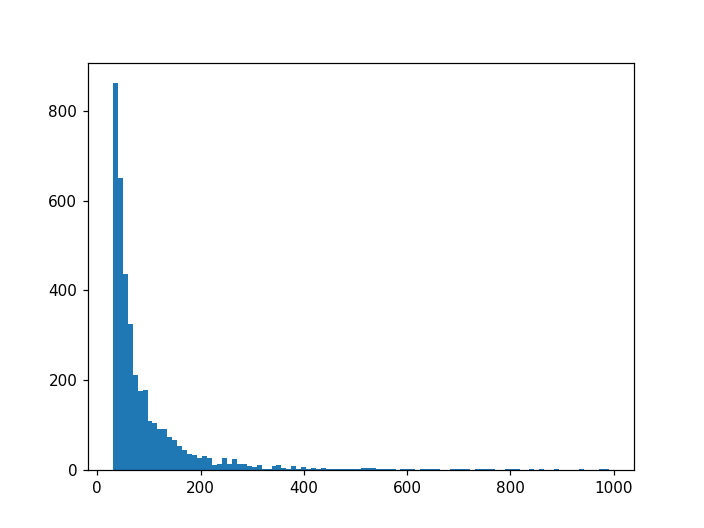

In [15]:
_ = plt.hist(amps, bins=100)

In [22]:
templates_filename = 'templates_300_neuropixels.h5'

In [35]:
tempgen.celltypes

array(['L5_BP_bAC217_1', 'L5_BP_bAC217_1', 'L5_BP_bAC217_1', ...,
       'L5_UTPC_cADpyr232_1', 'L5_UTPC_cADpyr232_1',
       'L5_UTPC_cADpyr232_1'], dtype='<U20')

In [16]:
# save templates
mr.save_template_generator(tempgen=tempgen, filename=templates_filename)


Saved  templates in templates_300_neuropixels.h5 



<IPython.core.display.Javascript object>


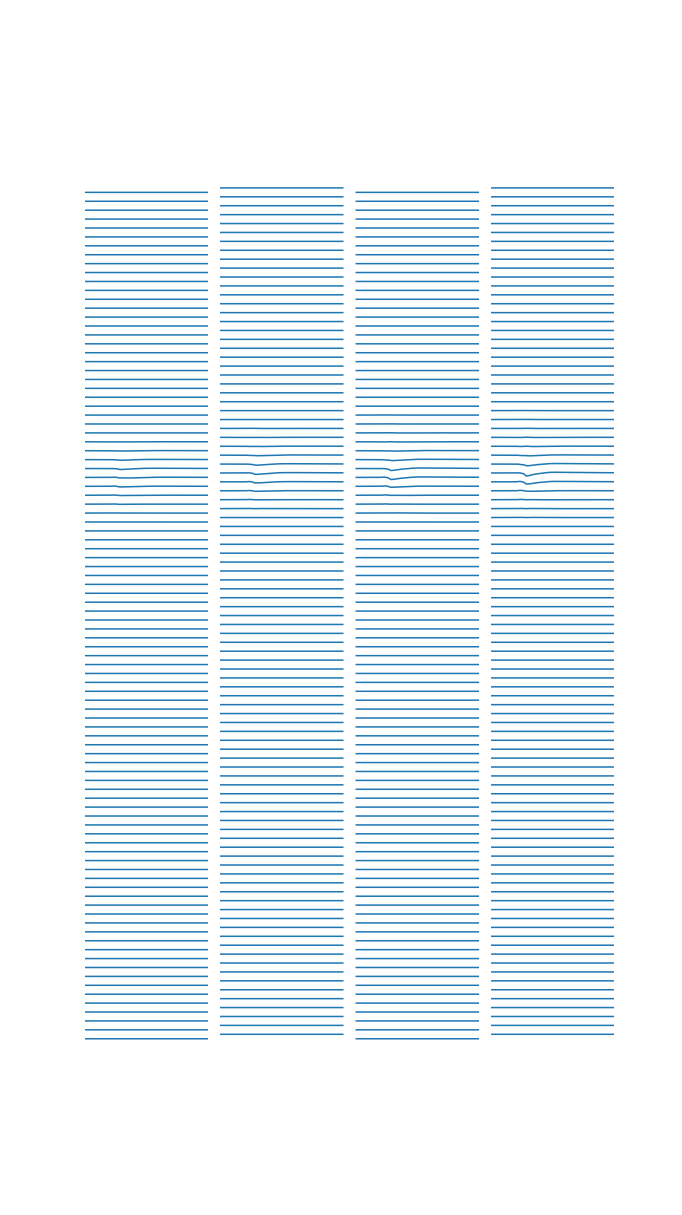

In [21]:
# plot some templates
template_ids = np.random.permutation(len(tempgen.templates))[:10]
ax = mr.plot_templates(tempgen, template_ids=[3001], 
                       single_axes=False)

## Generate recordings

In [23]:
recording_params = mr.get_default_recordings_params()
pprint(recording_params)

{'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
                'inhibitory': ['AC',
                               'BP',
                               'BC',
                               'BTC',
                               'ChC',
                               'DBC',
                               'MC',
                               'NGC']},
 'recordings': {'angle_tol': 15,
                'bursting': False,
                'chunk_conv_duration': 20,
                'chunk_filter_duration': 0,
                'chunk_noise_duration': 0,
                'color_noise_floor': 1,
                'color_peak': 300,
                'color_q': 2,
                'drift_velocity': 5,
                'drifting': False,
                'dtype': 'float32',
                'exp_decay': 0.2,
                'extract_waveforms': False,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp': 10,
                'far_neurons_n': 300,
                'far_neurons

In [24]:
# Set parameters
recording_params['spiketrains']['n_exc'] = 200
recording_params['spiketrains']['n_inh'] = 50
recording_params['spiketrains']['duration'] = 600
recording_params['spiketrains']['seed'] = 0


recording_params['templates']['min_amp'] = 40
recording_params['templates']['max_amp'] = 300
recording_params['templates']['seed'] = 0

recording_params['recordings']['modulation'] = 'electrode'
recording_params['recordings']['noise_mode'] = 'uncorrelated'
recording_params['recordings']['noise_level'] = 10
# use chunk options
recording_params['recordings']['chunk_conv_duration'] = 20
recording_params['recordings']['chunk_noise_duration'] = 20
recording_params['recordings']['chunk_filter_duration'] = 20
recording_params['recordings']['seed'] = 0

In [25]:
recgen = mr.gen_recordings(templates=templates_filename, params=recording_params, verbose=True)

Spiketrains seed:  0


/home/alessio/.virtualenvs/mearec/lib/python3.6/site-packages/quantities-0.12.3-py3.6.egg/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide


Noise Level  10
Templates selection seed:  4569
Selecting cells
Selecting Excitatory and Inhibitory cells
Min dist:  25 Min amp:  40
Amplitude or boundary violation 35.99174842765877 [ 23.09305812 -53.61285859 245.23707503] 2
Amplitude or boundary violation 31.33696146179863 [  36.06780794   39.49101041 1373.40523641] 3
Amplitude or boundary violation 36.89861537533969 [ 19.25358577 -21.95710127 899.26832804] 6
Amplitude or boundary violation 31.186673421919373 [  67.76037167  -16.95470182 1335.49379916] 14
Amplitude or boundary violation 39.74015026196034 [  17.59161593   18.93835687 1905.613948  ] 15
Amplitude or boundary violation 39.92485697720025 [ 34.00586316  29.53065337 -50.29125075] 18
Amplitude or boundary violation 31.84963196673684 [  20.20755908  -15.73162099 1566.59520446] 21
Distance violation 16.36503123127118 25
Amplitude or boundary violation 36.187862711371466 [  16.17540503    6.50406514 1824.00114546] 27
Amplitude or boundary violation 35.94200379285318 [  61.14350

Distance violation 7.4228928688340865 780
Distance violation 22.297953653535316 782
Distance violation 16.929655847896484 783
Amplitude or boundary violation 816.8498661771696 [  10.49955096  -30.85037732 -470.42533228] 784
Amplitude or boundary violation 32.61220446544794 [ 71.95458876 -49.17148365 785.86949479] 796
Amplitude or boundary violation 39.95544084709358 [   75.24973176   -39.40598269 -1527.47206931] 800
Distance violation 13.124812857970914 802
Distance violation 0.0 809
Distance violation 0.0 812
Distance violation 9.965234195669035 825
Distance violation 17.62436986784423 836
Amplitude or boundary violation 494.4668481430128 [  14.32647023   -3.16659029 1445.92696887] 840
Distance violation 22.992705585168157 851
Amplitude or boundary violation 436.94115566980327 [  13.21345912   17.34612206 -581.29716332] 855
Distance violation 22.89003416979372 863
Distance violation 13.773259505106848 866
Amplitude or boundary violation 886.7326246217466 [  10.49955096  -30.85037732 -

Done convolution with spike  11
Starting convolution with spike: 12 shape modulation: False
Done convolution with spike  12
Starting convolution with spike: 13 shape modulation: False
Done convolution with spike  13
Starting convolution with spike: 14 shape modulation: False
Done convolution with spike  14
Starting convolution with spike: 15 shape modulation: False
Done convolution with spike  15
Starting convolution with spike: 16 shape modulation: False
Done convolution with spike  16
Starting convolution with spike: 17 shape modulation: False
Done convolution with spike  17
Starting convolution with spike: 18 shape modulation: False
Done convolution with spike  18
Starting convolution with spike: 19 shape modulation: False
Done convolution with spike  19
Starting convolution with spike: 20 shape modulation: False
Done convolution with spike  20
Starting convolution with spike: 21 shape modulation: False
Done convolution with spike  21
Starting convolution with spike: 22 shape modula

Done convolution with spike  101
Starting convolution with spike: 102 shape modulation: False
Done convolution with spike  102
Starting convolution with spike: 103 shape modulation: False
Done convolution with spike  103
Starting convolution with spike: 104 shape modulation: False
Done convolution with spike  104
Starting convolution with spike: 105 shape modulation: False
Done convolution with spike  105
Starting convolution with spike: 106 shape modulation: False
Done convolution with spike  106
Starting convolution with spike: 107 shape modulation: False
Done convolution with spike  107
Starting convolution with spike: 108 shape modulation: False
Done convolution with spike  108
Starting convolution with spike: 109 shape modulation: False
Done convolution with spike  109
Starting convolution with spike: 110 shape modulation: False
Done convolution with spike  110
Starting convolution with spike: 111 shape modulation: False
Done convolution with spike  111
Starting convolution with s

Done convolution with spike  189
Starting convolution with spike: 190 shape modulation: False
Done convolution with spike  190
Starting convolution with spike: 191 shape modulation: False
Done convolution with spike  191
Starting convolution with spike: 192 shape modulation: False
Done convolution with spike  192
Starting convolution with spike: 193 shape modulation: False
Done convolution with spike  193
Starting convolution with spike: 194 shape modulation: False
Done convolution with spike  194
Starting convolution with spike: 195 shape modulation: False
Done convolution with spike  195
Starting convolution with spike: 196 shape modulation: False
Done convolution with spike  196
Starting convolution with spike: 197 shape modulation: False
Done convolution with spike  197
Starting convolution with spike: 198 shape modulation: False
Done convolution with spike  198
Starting convolution with spike: 199 shape modulation: False
Done convolution with spike  199
Starting convolution with s

<IPython.core.display.Javascript object>


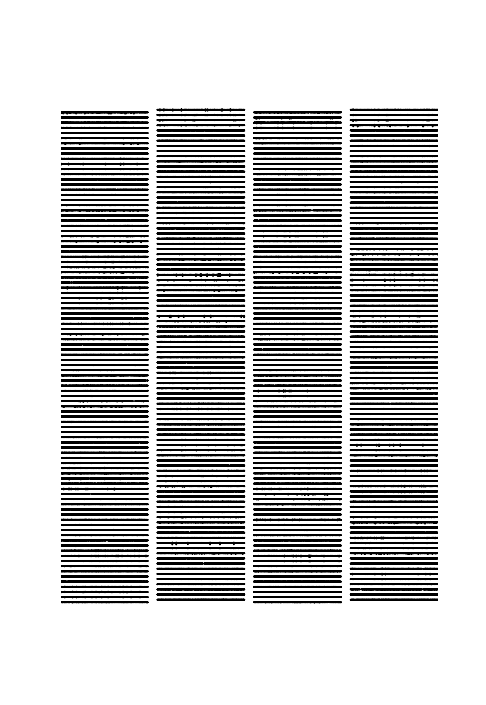

In [26]:
mr.plot_recordings(recgen, start_time=0, end_time=2)

In [27]:
# plot selected templates amplitudes
amps = []
for t in recgen.templates:
    amps.append(np.abs(np.min(t)))
amps = np.array(amps)

<IPython.core.display.Javascript object>


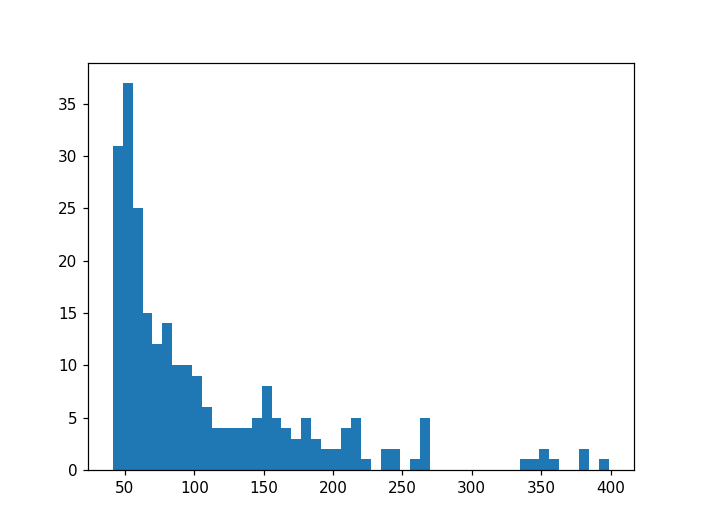

In [34]:
fig = plt.figure()
ax_amp = fig.add_subplot(111)

_ = ax_amp.hist(amps, bins=50)

In [ ]:
# save recording
mr.save_recording_generator(recgen, 'recording_neuropixels_600s_350cells.h5')